In [2]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

## Define function to detect object

In [3]:
def detect_object(image_path: str):
    # Load the YOLO model
    model = YOLO('../model/yolo11n.pt')

    # Read an image for object detection to OpenCV
    image = cv2.imread(image_path)

    # Perform object detection
    results = model(image)

    # Extract detected object names
    detected_objects_list = [
        model.names[int(cls)] for cls in results[0].boxes.cls]
    detected_objects_set = set(detected_objects_list)

    # Print detected classes in the desired format
    print("detected classes:", ', '.join(detected_objects_set))

    # Plot and show the results
    annotated_image = results[0].plot()

    # Save the annotated image
    output_directory = '../predict/'
    if not os.path.exists(output_directory):
        # Create the directory if it doesn't exist
        os.makedirs(output_directory)

    # Create a name for the output image (based on the input image's name)
    output_image_path = os.path.join(
        output_directory, os.path.basename(image_path))

    # Save the annotated image using OpenCV
    cv2.imwrite(output_image_path, annotated_image)
    print(f"Annotated image saved to {output_image_path}")

    # Show the result
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## Detect objects

### Try to detect cat with many perspective


0: 640x512 2 cats, 92.2ms
Speed: 5.7ms preprocess, 92.2ms inference, 8.7ms postprocess per image at shape (1, 3, 640, 512)
detected classes: cat
Annotated image saved to ../predict/cat-00.jpeg


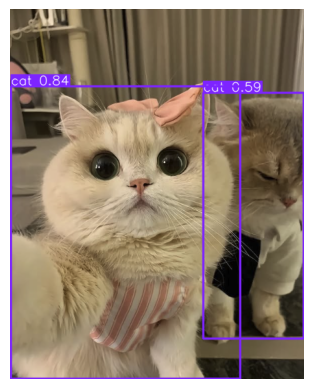

In [4]:
detect_object("../resource/cat-00.jpeg")


0: 640x448 1 cat, 62.2ms
Speed: 6.4ms preprocess, 62.2ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 448)
detected classes: cat
Annotated image saved to ../predict/cat-01.jpeg


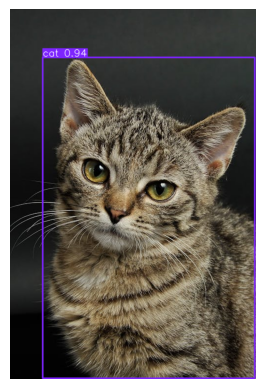

In [3]:
detect_object("../resource/cat-01.jpeg")


0: 384x640 1 cat, 67.1ms
Speed: 1.6ms preprocess, 67.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
detected classes: cat
Annotated image saved to ../predict/cat-02.jpeg


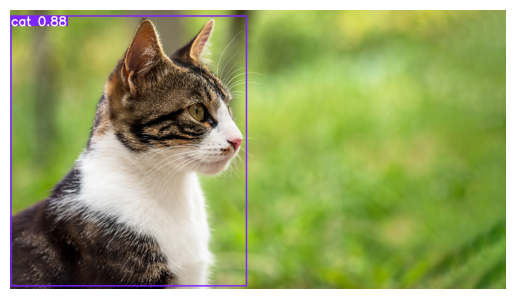

In [4]:
detect_object("../resource/cat-02.jpeg")


0: 352x640 1 cat, 36.0ms
Speed: 1.4ms preprocess, 36.0ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 640)
detected classes: cat
Annotated image saved to ../predict/cat-03.jpeg


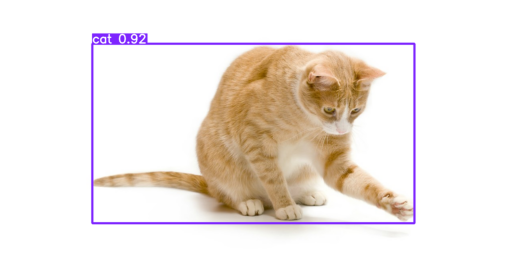

In [5]:
detect_object("../resource/cat-03.jpeg")

### Try to detect others class


0: 448x640 1 dog, 44.2ms
Speed: 1.7ms preprocess, 44.2ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
detected classes: dog
Annotated image saved to ../predict/dog-01.jpeg


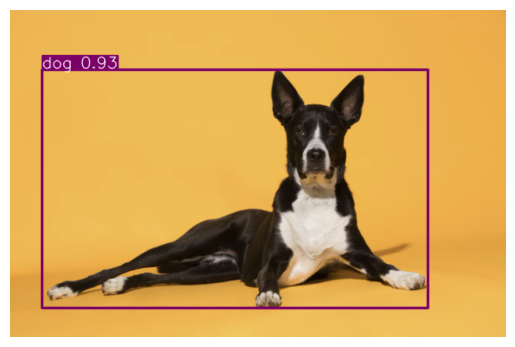

In [8]:
detect_object("../resource/dog-01.jpeg")